In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [7]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [8]:
#ucb
import math

In [9]:
N=10000
d=10
ads_selected=[]
number_of_selection=[0]*d
sum_of_reward=[0]*d
total_reward=0
for n in range(0,N):
    max_upper_band=0
    ad=0
    for i in range(0,d):
        if(number_of_selection[i]>0):
            avg_reward = sum_of_reward[i] / number_of_selection[i]
            conf_interval = math.sqrt(3/2 * math.log(n+1)/number_of_selection[i])
            upper_band = avg_reward + conf_interval
        else:
            upper_band = 1e400
        if upper_band>max_upper_band:
            max_upper_band=upper_band
            ad=i
    ads_selected.append(ad)
    number_of_selection[ad]=number_of_selection[ad] + 1
    reward=dataset.values[n,ad]
    sum_of_reward[ad] = sum_of_reward[ad] + reward
    total_reward=total_reward + reward
    
        






In [10]:
total_reward

2178

In [11]:
ads_selected[9990:]


[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [12]:
#mostly user selected ad no 5.


In [13]:
 #visualization:

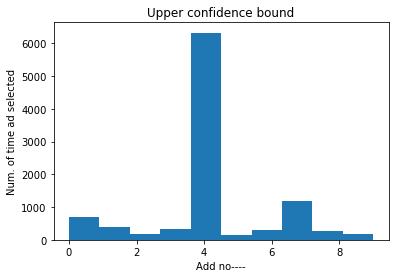

In [14]:
plt.hist(ads_selected)
plt.title('Upper confidence bound')
plt.xlabel('Add no----')
plt.ylabel('Num. of time ad selected')